In [98]:
#Import necesarry libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Just to check model score we import this
from sklearn.metrics import r2_score
#For testing our implementation
from sklearn.preprocessing import StandardScaler


In [99]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [100]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [101]:
input_cols = ['carat', 'depth', 'table']
target_col = 'price'
train_df = df[input_cols]
train_targets = df[target_col]

In [102]:
scaler = StandardScaler()
train_df_scaled = pd.DataFrame(scaler.fit_transform(train_df), columns=input_cols)
train_df_scaled.head()

,carat,depth,table
0,-1.198168,-0.174092,-1.099672
1,-1.240361,-1.360738,1.585529
2,-1.198168,-3.385019,3.375663
3,-1.071587,0.454133,0.242928
4,-1.029394,1.082358,0.242928


<Axes: xlabel='carat', ylabel='price'>

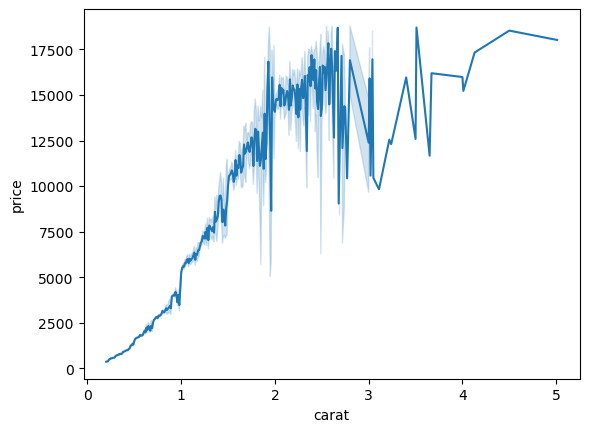

In [103]:
sns.lineplot(data = df, x= 'carat', y='price')

<Axes: xlabel='depth', ylabel='price'>

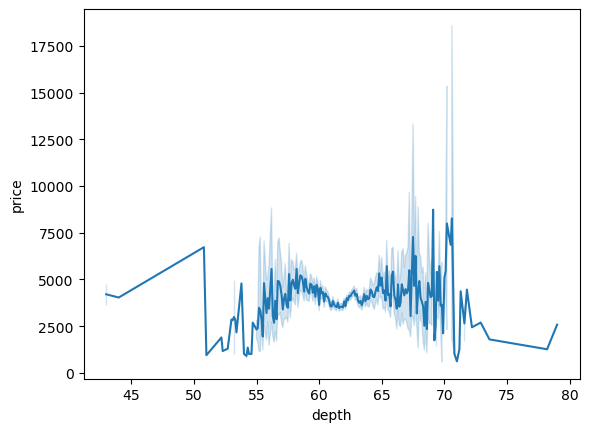

In [104]:
sns.lineplot(data = df, x= 'depth', y='price')

<Axes: xlabel='table', ylabel='price'>

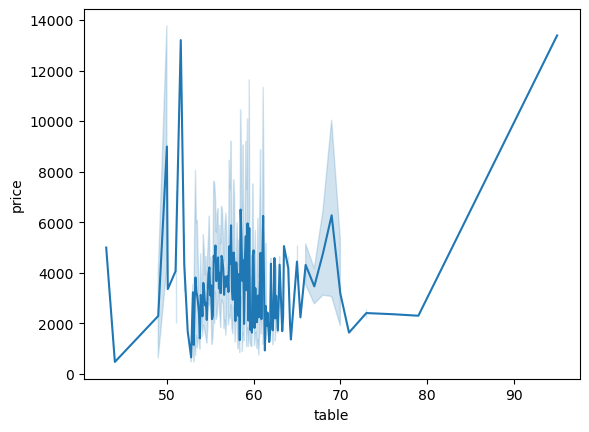

In [105]:
sns.lineplot(data = df, x= 'table', y='price')

In [106]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
dtypes: float64(3)
memory usage: 1.2 MB


In [107]:
train_targets.info()

<class 'pandas.core.series.Series'>
RangeIndex: 53940 entries, 0 to 53939
Series name: price
Non-Null Count  Dtype
--------------  -----
53940 non-null  int64
dtypes: int64(1)
memory usage: 421.5 KB


In [108]:
class LinearRegression:
  #getting the parameters right
  def fit(self,input, targets):
    input = np.array(input)
    targets = np.array(targets)
    
    rows, inputs = input.shape
    self.weights = np.zeros(inputs)
    self.bias = 0
    self.learning_rate = 0.01  # Increased from 0.0001 (safe with scaled features)
    self.n_iterations = 10000  # Increased from 1000 for better convergence
    self.Losses = []

    #Setting up stochastic gradient descent
    for i in range(self.n_iterations):
      pred = np.dot(input,self.weights) + self.bias

      #Compute the error of each iteration(use Mean squared error)
      loss = np.mean(np.square(targets - pred))
      self.Losses.append(loss)

      #Improve the weights and biases for the linear model using gradient descent

      self.weights -= self.learning_rate * (2/rows) * np.dot(input.T, (pred - targets))
      self.bias-= self.learning_rate * (2/rows) * np.sum(pred - targets)

  #Seting up the predict function
  def predict(self,inputs):
    return np.dot(inputs, self.weights) + self.bias

In [109]:
model = LinearRegression()

In [110]:
model.fit(train_df_scaled, train_targets)

In [111]:
preds = model.predict(train_df_scaled)
preds

array([-236.0805007 , -762.99080215, -585.12110662, ..., 2738.57048722,
       4477.14475352, 3744.61472164], shape=(53940,))

In [112]:
train_targets

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [113]:
preds

array([-236.0805007 , -762.99080215, -585.12110662, ..., 2738.57048722,
       4477.14475352, 3744.61472164], shape=(53940,))

In [114]:
np.array(train_targets)

array([ 326,  326,  327, ..., 2757, 2757, 2757], shape=(53940,))

In [115]:
score = r2_score(train_targets,preds)
score

0.8536762884061407

## Right now our model is pretty bad as our R2 score is 0.08, we'll try to fix this later